In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sns.set(style="white", color_codes=True)


In [3]:
# import warnings
# warnings.filterwarnings("ignore")


In [5]:

# dataset = pd.read_csv('Iris.csv')
# x = dataset.iloc[:,[1,2,3,4]]
# y = dataset.iloc[:,-1]

# print(x.shape, y.shape)

(150, 4) (150,)


In [7]:
# print(x[:5])

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [8]:
# print(y[:5])

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [9]:

# # see how many samples we have of each species
# print(dataset["Species"].value_counts())

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


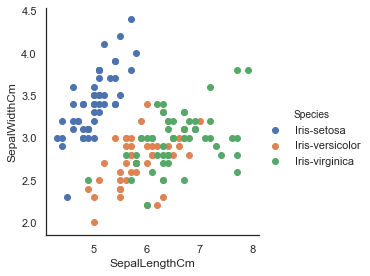

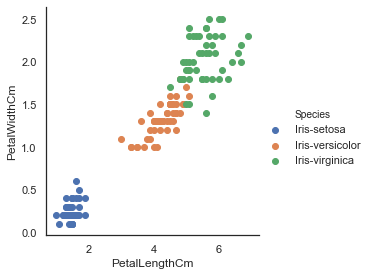

In [10]:
# sns.FacetGrid(dataset, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
# # do same for petals
# sns.FacetGrid(dataset, hue="Species", size=4).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
# plt.show()


In [11]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)


In [12]:
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.5525919445499757


In [114]:
import pandas as pd

In [115]:
dataset = pd.read_csv("K-Mean_Dataset.csv")

In [116]:
dataset.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [117]:
mean1=dataset['CREDIT_LIMIT'].mean()
mean2=dataset['MINIMUM_PAYMENTS'].mean()
dataset['CREDIT_LIMIT'].fillna(value=mean1, inplace=True)
dataset['MINIMUM_PAYMENTS'].fillna(value=mean2, inplace=True)

In [118]:
dataset.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [120]:
table = dataset.iloc[:,1:]          

In [121]:
table[:5]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


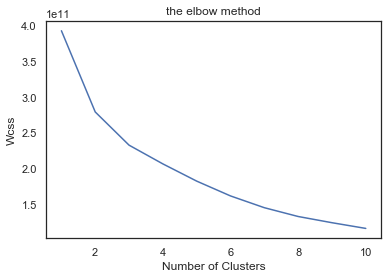

In [119]:
# ##elbow method to know the number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(table)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()


In [122]:
#  Calculate the silhouette score for the above clustering
#since the elbow point is at 3 
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(table)

y_cluster_kmeans = km.predict(table)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)


0.46504469672047805


In [123]:
# feature scaling using standard scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(table)
X_scaled_array = scaler.transform(table)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

In [124]:
#  Calculate the silhouette score for the above clustering 

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)

0.24996085627555273
